# Parametrized model for onshore and offshore wind turbines

Authors: Romain Besseau [romain.besseau@mines-paristech.fr](mailto:romain.besseau@mines-paristech.fr) and Romain Sacchi [r_s@me.com](mailto:r_s@me.com)

The script below was used to generate life cycle inventories of wind turbines based on the [Danish wind turbines registry](https://ens.dk/sites/ens.dk/files/Statistik/anlaegprodtilnettet.xls).
Results were used in the following publications:

Romain Sacchi, Romain Besseau, Paula Pérez-López, Isabelle Blanc, Exploring technologically, temporally and geographically-sensitive life cycle inventories for wind turbines: A parameterized model for Denmark, Renewable Energy, Volume 132, 2019, Pages 1238-1250, ISSN 0960-1481, [doi.org/10.1016/j.renene.2018.09.020](https://doi.org/10.1016/j.renene.2018.09.020).

and

Romain Besseau, Romain Sacchi, Isabelle Blanc, Paula Pérez-López, Past, present and future environmental footprint of the Danish wind turbine fleet with LCA_WIND_DK, an online interactive platform, Renewable & Sustainable Energy Reviews, online, 2019, [doi.org/10.1016/j.rser.2019.03.030](https://doi.org/10.1016/j.rser.2019.03.030).

We need first to import a few librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import brightway2 as bw
from scipy.interpolate import InterpolatedUnivariateSpline
plt.style.use('ggplot')
%matplotlib inline

And the following assumes you have an BW2 project within which ecoinvent 3.4 cutoff is installed. If not, you should create a project and install ecoinvent before going any further. 

In [2]:
bw.projects.set_current('my_project')
eidb = bw.Database('ecoinvent 3.4 cut off')

## Creation of datasets for power transformers

Let's start by creating datasets for high voltage and medium voltage power transformer. These datasets are based on the EPD of ABB's power transformers.

This has to be executed once.

### creation of 500 MVA transformer dataset

In [3]:
if [act for act in eidb if 'Power transformer TrafoStar 500 MVA' in act['name']] == []:

    act_transfo=[act for act in eidb if act["name"]=="transformer production, high voltage use"][0]

    new_act=act_transfo.copy()
    new_act["name"]="Power transformer TrafoStar 500 MVA"
    new_act["unit"]="unit"
    new_act.save()

    for exc in new_act.exchanges():
        exc.delete()
    new_act.save()

    #electric steel
    steel=[act for act in eidb if "steel production, electric, low-alloyed" in act["name"] and "RER" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=99640,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #transformer oil
    steel=[act for act in eidb if "market for lubricating oil" in act["name"] and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=63000,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #copper
    steel=[act for act in eidb if act["name"]=="market for copper" and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=39960,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #insulation
    steel=[act for act in eidb if act["name"]=="market for glass wool mat"  and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=6500,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #wood
    steel=[act for act in eidb if act["name"]== "planing, board, softwood, u=20%" and "CH" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=15000,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #porcelain
    steel=[act for act in eidb if act["name"]=="market for ceramic tile" and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=2650,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #construction steel
    steel=[act for act in eidb if act["name"]=="market for steel, unalloyed" and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=53618,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #paint
    steel=[act for act in eidb if act["name"]== "market for electrostatic paint" and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=2200,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #electricity, medium
    steel=[act for act in eidb if act["name"]=="market for electricity, medium voltage" and "SE" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=750000,unit="kilowatt hour",type='technosphere')
    new_exc.save()
    new_act.save()

    #heat
    steel=[act for act in eidb if act["name"]=="heat, from municipal waste incineration to generic market for heat district or industrial, other than natural gas" and "SE" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=1080000,unit="megajoule",type='technosphere')
    new_exc.save()
    new_act.save()

    #output
    steel=[act for act in eidb if act["name"]=="Power transformer TrafoStar 500 MVA"][0]
    new_exc = new_act.new_exchange(input=new_act.key,amount=1,unit="unit",categories="",type='production')
    new_exc.save()
    new_act.save()

### creation of 10 MVA transformer dataset

In [4]:
if [act for act in eidb if 'Power transformer TrafoStar 10 MVA' in act['name']] == []:

    act=[a for a in eidb if "Power transformer TrafoStar 500 MVA" in a["name"]][0]
    new_act=act.copy()
    new_act["name"]="Power transformer TrafoStar 10 MVA"
    new_act.save()

    for exc in new_act.exchanges():
        print(exc.input['name'])
        if exc.input['name']=="steel production, electric, low-alloyed":
            exc["amount"]=6820
            exc.save()

        if exc.input['name']=="market for lubricating oil":
            exc["amount"]=6780
            exc.save()

        if exc.input['name']=="market for copper":
            exc["amount"]=3526
            exc.save()

        if exc.input['name']=="market for ceramic tile":
            exc["amount"]=53
            exc.save()

        if exc.input['name']=="market for steel, unalloyed":
            exc["amount"]=9066
            exc.save()

        if exc.input['name']=="market for electrostatic paint":
            exc["amount"]=95
            exc.save()

        if exc.input['name']=="market for electricity, medium voltage":
            exc["amount"]=105200
            exc.save()

        if exc.input['name']=="heat, from municipal waste incineration to generic market for heat district or industrial, other than natural gas":
            exc["amount"]=68760
            exc.save()

        if exc.input['name']=="market for aluminium, cast alloy":
            exc["amount"]=65
            exc.save()

        if exc.input['name']=="market for sheet rolling, steel":
            exc.delete()
        if exc.input['name']=="market for epoxy resin, liquid":
            exc.delete()
        if exc.input['name']=="market for glass fibre":
            exc.delete()
        if exc.input['name']=="market for kraft paper, bleached":
            exc.delete()
        if exc.input['name']=="market for paper, melamine impregnated":
            exc.delete()
        if exc.input['name']=="market for electrostatic paint":
            exc.delete()
        if exc.input['name']=="market for glass fibre":
            exc.delete()

        if exc.input['name']=="Power transformer TrafoStar 250 MVA":
            exc.input['name']="Power transformer TrafoStar 10 MVA"
            exc.input=new_act
            exc.save()

    #insulation
    steel=[act for act in eidb if "market for glass wool mat" in act["name"] and "GLO" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=337,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

    #wood
    steel=[act for act in eidb if "planing, board, softwood, u=20%" in act["name"] and "CH" in act["location"]][0]
    new_exc = new_act.new_exchange(input=steel.key,amount=366,unit="kilogram",type='technosphere')
    new_exc.save()
    new_act.save()

## Foundation functions

These functions are used to size foundation, electrical connexions, etc...

In [3]:
def pile_weight(p, pile_height):
    #diameters, in meters
    diameter=[5, 5.5, 5.75, 6.75 ,7.75 ]
    #kW
    power=[3000,3600,4000,8000,10000]
    fit_diameter= np.polyfit(power, diameter, 1)
    f_fit_diameter=np.poly1d(fit_diameter)
    
    #diameter for given power, in m
    outer_diameter=f_fit_diameter(p)
    #Cross section area of pile
    outer_area=(np.pi/4)*(outer_diameter**2)
    #Pile volume, in m3
    outer_volume=outer_area*pile_height
    
    inner_diameter= outer_diameter
    pile_thickness = np.interp(p, [2000, 3000, 3600, 4000, 8000, 10000], [0.07,0.10, 0.13, 0.16, 0.19, 0.22])
    inner_diameter-= 2 * pile_thickness
    inner_area=(np.pi/4)*(inner_diameter**2)
    inner_volume=inner_area*pile_height
    volume_steel=outer_volume-inner_volume
    weight_steel=8000*volume_steel
    return  weight_steel

def transition_height():
    pile_length=[35,55,35,60,40,65,50,70,50,80]
    transition_length=[15,20,15,20,15,24,20,30,20,31]
    fit_transition_length= np.polyfit(pile_length, transition_length, 1)
    return np.poly1d(fit_transition_length)

fit_transition_height = transition_height()

def transition_weight():
    transition_length=[15,20,15,20,15,24,20,30,20,31]
    transition_weight=[150,250,150,250,160,260,200,370,250,420]
    fit_transition_weight= np.polyfit(transition_length, transition_weight, 1)
    return np.poly1d(fit_transition_weight)

fit_transition_weight = transition_weight()

def grout_volume():
    transition_length=[15,20,15,20,15,24,20,30,20,31]
    grout=[15,35,15,35,20,40,25,60,30,65]
    fit_grout= np.polyfit(transition_length, grout, 1)
    return np.poly1d(fit_grout)

fit_grout_volume = grout_volume()

def scour_volume():
    scour=[2200, 2200, 2600, 3100, 3600]
    turbine_power=[3000, 3600, 4000, 8000, 10000]
    fit_scour=np.polyfit(turbine_power, scour, 1)
    return np.poly1d(fit_scour)

fit_scour_volume = scour_volume()

def pile_height(P, fit_penetration_depth, sea_depth):
    return 9 + fit_penetration_depth(P)+ sea_depth

def penetration_depth():
    #meters
    depth=[22.5,22.5,23.5,26,29.5]
    #kW
    P = [3000,3600,4000,8000,10000]
    fit_penetration= np.polyfit(P, depth, 1)
    f_fit_penetration=np.poly1d(fit_penetration)
    return f_fit_penetration

fit_penetration_depth = penetration_depth()

def transport_requirements(M_nacelle,  M_tower, M_rotor,  M_foundation,  M_all, LT):
    #taken from Vestas 2012 LCA report
    #https://www.vestas.com/~/media/vestas/about/sustainability/pdfs/lca_v903mw_version_1_1.pdf
    trsp_truck_nacelle=1025*(M_nacelle/1000)
    trsp_truck_rotor=600*(M_rotor/1000)
    trsp_truck_tower=1100*(M_tower/1000)
    trsp_ship_tower=8050*(M_tower/1000)
    trsp_truck_foundation= 50*(M_foundation/1000)
    
    #transport to local waste facilities
    trsp_end_of_life=200*(M_all/1000)
    
    #30 turbines per plant
    trsp_maintenance_per_year = 2160/30/1000*LT
    
    #600 km by ship assumed
    trsp_ship_offshore = 600*(M_all/1000)
    return trsp_truck_nacelle, trsp_truck_rotor, trsp_truck_tower, trsp_ship_tower,trsp_truck_foundation, trsp_end_of_life, trsp_maintenance_per_year, trsp_ship_offshore

def grout_and_monopile_requirements(P, sea_depth):
    pile_length = pile_height(P, fit_penetration_depth, sea_depth)
    transition_lenght = fit_transition_height(pile_length)
    
    density = 2400 #kg/m**3
    m_grout = fit_grout_volume(transition_lenght) * density  
    
    m_monopile = 1e3*fit_transition_weight(transition_lenght)
    return m_grout, m_monopile


#Nexans cable at 150 kV, section, ampacity and power capacity in kW
df150 = pd.DataFrame(index = [400, 500, 630, 800,1000, 1200, 1600, 2000])
df150['I'] = [710, 815, 925, 1045, 1160, 1335, 1425, 1560]
df150['P'] = 150 * df150['I']

#Nexans cable at 150 kV, section, ampacity and power capacity in kW
df33 = pd.DataFrame(index = [95, 120, 150, 185, 240, 300, 400, 500, 630, 800])
df33['I'] = [352, 399, 446, 502, 581, 652, 726, 811, 904, 993]
df33['P'] = 33 * df33['I']

# defines cable requirements for offshore foundations
def cable_requirements(P, park_size, dist_transfo, dist_coast, affiche = False):
    copper_density = 8960
    
    #Cable of 300 mm² cross section allocated according to the wind turbine power
    cross_section1 = 300 * P / df33.loc[300].P 
    if affiche:
        print('cross_section1 : %s mm²' %cross_section1)
    #
    m_copper = (cross_section1*1e-6*(dist_transfo*1e3))*copper_density 
    energy_cable_laying_ship = 450 * 39 / 15 * dist_transfo # 450 l diesel/hour for the ship that lays the cable at sea bottom
    #39 MJ/liter, 15 km/h as speed of laying the cable
    
    #Cross section calculated based on the farm cumulated power, 
    #and the transport capacity of the Nexans cables @ 150kV if the cumulated power of the park cannot be
    #transported @ 33kV
    
    #Test if the cumulated power of teh wind farm is inferior to 30 MW,
    # If so, we use 33 kV cables.
    
    if P*park_size <= 30e3:
        cross_section2 = np.interp(P*park_size, df33.P.values, df33.index.values)
    #Otherwise, we use 150 kV cables
    else:
        cross_section2 = np.interp(P*park_size, df150.P.values, df150.index.values)
    if affiche:
        print('cross_section2 : %s mm²' %cross_section2)
        
    m_copper += (cross_section2*1e-6*(dist_coast*1e3/park_size))*copper_density
    energy_cable_laying_ship += 450 * 39 / 15 * dist_coast/park_size #450 l/h de conso, 39 MJ/l, 15 km/h de vitesse d'installation
    
    m_cable = m_copper*617/220
    return m_cable*0.5, energy_cable_laying_ship*0.5

# defines cable requirements for onshore foundations
def cable_requirements_Onshore(P, affiche = False):
    copper_density = 8960
    
    #Cable of 300 mm² cross section allocated according to the wind turbine power
    cross_section1 = 300 * P / df33.loc[300].P 
    #Calculation of the cable length starting fromt eh road surface, with assumed with of 8 meters
    cable_length = np.interp(P, [0, 2000],[0, 8000]) / 8    
    
    if affiche:
        print('cross_section1 : %s mm²' %cross_section1)
        print('cable length : %s m' %cable_length)
    #
    m_copper = (cross_section1*1e-6*(cable_length))*copper_density 
        
    m_cable = m_copper*617/220
    return m_cable*0.5

def add_to_dict(dictionary, key, value):
    if key not in dictionary:
         dictionary[key] = value
    else:
         dictionary[key] = dictionary[key] + value


### Activities

Now, let's load inventories of a 30 kW, 150 kW, 600 kW, 800 kW, 2000 kW wind turbines. These files contains lifecycle activities that has to be linked with activities of the ecoinvent database. That will be done executing the function find_UUID(). As it takes quite long, the dataframe containing all the necessary information can be saved in a pikcle files and be loaded directly.

### To create a pickle

In [6]:
path = 'to define'

In [7]:
datasets=pd.read_excel(path + 'Wind turbines inventories.xlsx', sheetname="All", dtype=None, decimal=";", header=0)
del datasets['Unnamed: 9']
datasets.head()

,Power,Phase,Component,Sub-component,Dataset,Unit,Quantity,Database name,Market name
0,30kW,Assembly,Foundation,Assembly,Diesel,MJ,5310.00,ecoinvent 3.3 cutoff,"market for diesel, burned in building machine"
1,30kW,Assembly,Foundation,Assembly,Explosives,kg,10.00,ecoinvent 3.3 cutoff,"market for explosive, tovex"
2,30kW,Assembly,Nacelle,Assembly,Copper wire drawing,kg,17.00,ecoinvent 3.3 cutoff,"market for wire drawing, copper"
3,30kW,Assembly,Nacelle,Assembly,Aluminium sheet rolling,kg,14.70,ecoinvent 3.3 cutoff,"market for sheet rolling, aluminium"
4,30kW,Assembly,Nacelle,Assembly,Chromium steel sheet rolling,kg,736.50,ecoinvent 3.3 cutoff,"market for sheet rolling, chromium steel"
5,30kW,Assembly,Nacelle,Assembly,Steel sheet rolling,kg,317.00,ecoinvent 3.3 cutoff,"market for sheet rolling, steel"
6,30kW,Assembly,Nacelle,Assembly,Electricity [kWh],kWh,575.00,ecoinvent 3.3 cutoff,"market for electricity, high voltage"
7,30kW,Assembly,Tower,Assembly,Steel sheet rolling,kg,5299.00,ecoinvent 3.3 cutoff,"market for sheet rolling, steel"
8,30kW,Assembly,Tower,Assembly,Steel arc welding [m],m,84.00,ecoinvent 3.3 cutoff,"market for welding, arc, steel"
9,30kW,Assembly,Tower,Assembly,Galvanizing [m],m,74.00,ecoinvent 3.3 cutoff,"market for zinc coat, pieces"


In [8]:
#Use of cement for foundation and reinforcing steel for foundation
datasets = datasets.replace('market for concrete, normal','market for concrete, sole plate and foundation')
datasets.loc[datasets[(datasets['Component']=='Foundation')&(datasets['Market name']=='market for steel, low-alloyed')].index, 'Market name'] = 'market for reinforcing steel'
datasets.loc[datasets[(datasets['Component']=='Foundation')&(datasets['Market name']=='market for reinforcing steel')].index, 'Dataset'] = 'Reinforcing steel'

In [9]:
datasets.Dataset.unique()

array(['Diesel', 'Explosives', 'Copper wire drawing',
       'Aluminium sheet rolling', 'Chromium steel sheet rolling',
       'Steel sheet rolling', 'Electricity [kWh]', 'Steel arc welding [m]',
       'Galvanizing [m]', 'Fiberglass -waste', 'Rubber', 'Lubricating oil',
       'Concrete, inert waste', 'Steel, inert waste', 'HDPE granules',
       'PVC impact resistant', 'PP granules', 'Concrete [m3]',
       'Reinforcing steel', 'Conversion of meadows and pastures [m2]',
       'Conversion to urban area [m2]',
       'Conversion to industrial area [m2]', 'Use of traffic area',
       'Use of industrial area', 'Chromium steel', 'Cast iron',
       'Aluminium 0% recycled', 'Copper', 'Fiberglass', 'Low-alloy steel',
       'Epoxy resin', 'Tin', 'Lead', 'Car [km]', 'Use of urban area'], dtype=object)

In [10]:
def find_UUID():
    list_unique_act=datasets["Market name"].unique()
    order_preference=["DK", "DE", "CH", "RER", "RoW", "GLO"]
    
    for act in list_unique_act:
        print(act)
        for pref in order_preference:
            list_act=[a for a in eidb if act in a["name"] and pref in a["location"]]
            if len(list_act)==1:
                datasets.loc[:,"UUID"][datasets.loc[:,"Market name"]==act]=list_act[0]["code"]
                break
            if len(list_act)>1:
                list_act=[a for a in eidb if act == a["name"] and pref in a["location"]]
                datasets.loc[:,"UUID"][datasets.loc[:,"Market name"]==act]=list_act[0]["code"]
                break
            else:
                list_act=[a for a in bw.Database("biosphere3") if act in a["name"]]
                if len(list_act)>0:
                    datasets.loc[:,"UUID"][datasets.loc[:,"Market name"]==act]=list_act[0]["code"]
                    break
                else:
                    datasets.loc[:,"UUID"][datasets.loc[:,"Market name"]==act]=[a for a in bw.Database("biosphere3") if 'Transformation, from pasture, man made, intensive' in a["name"]][0]['code']
                
        
def get_act_country():
    list_unique_uuid=datasets.loc[:,"UUID"].unique()
    for uuid in list_unique_uuid:
        try:
            datasets.loc[:,"Location"][datasets.loc[:,"UUID"]==uuid]=bw.get_activity((eidb.name, uuid))["location"]
        except:
            datasets.loc[:,"Location"][datasets.loc[:,"UUID"]==uuid]=None

datasets["UUID"]=0
find_UUID()
datasets["Location"]=0
get_act_country()

market for diesel, burned in building machine


C:\Users\romain\Miniconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


market for explosive, tovex
market for wire drawing, copper
market for sheet rolling, aluminium
market for sheet rolling, chromium steel
market for sheet rolling, steel
market for electricity, high voltage
market for welding, arc, steel
market for zinc coat, pieces
treatment of inert waste, inert material landfill
market for waste rubber, unspecified
market for waste mineral oil
market for waste reinforced concrete
market for scrap steel
market for waste polyethylene/polypropylene product
market for waste polyvinylchloride product
market for waste polypropylene
market for concrete, sole plate and foundation
market for reinforcing steel
Transformation, from pasture and meadow
Transformation, to urban, continuously built
Transformation, to industrial area
Occupation, traffic area
Occupation, industrial area
market for steel, chromium steel 18/8
market for synthetic rubber
market for cast iron
market for aluminium, wrought alloy
market for copper
market for glass fibre reinforced plastic,

C:\Users\romain\Miniconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\romain\Miniconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
#We add recycling of aluminium and chromium steel
df_act = datasets
df_act2 = pd.DataFrame(index = df_act.columns)

new_act = [act for act in eidb if 'market for waste' in act['name'] and 'aluminium' in act['name'] ][0]
print(new_act)
df_act2[new_act['name']] = [None, 'Disposal', None, None,'Aluminium waste', 'kg', None, eidb.name, new_act['name'], new_act['code'], new_act['location']]

df_act = df_act.append(df_act2.T)
df_act = df_act.append(df_act[df_act['Dataset'] =='Steel, inert waste'].iloc[0].replace('Steel, inert waste','Chromium Steel waste'))
df_act

df_act = df_act.replace('ecoinvent 3.3 cutoff', eidb.name)

#Saving data into a pickle
df_act.to_pickle('activities and uuids.pkl')

'market for waste aluminium' (kilogram, GLO, None)


### To load the pickle

In [4]:
#Loading data from the pickle
df_act = pd.read_pickle('activities and uuids.pkl')

## Inventories

Now let's use values of the inventories. Values expressed in kg are normalized to get the share of different material.
Values not expressed in kg are used directly. At that stage, 2 new dataframe are created and saved in a pickle. Once created, they can be directly loaded to save time.

### To create the pickle

In [14]:
#Loading wind turbine inventories dataframe and creating 'df_inv.pkl'
# All that has "kg" as unit
df_inv = pd.read_excel(path + 'Wind turbines inventories.xlsx')

df_inv = df_inv.replace('30kW', 30)
df_inv = df_inv.replace('150kW',150)
df_inv = df_inv.replace('600kW', 600)
df_inv = df_inv.replace('800kW', 800)
df_inv = df_inv.replace('2000kW', 2000)

df_inv = df_inv[ df_inv.Unit == 'kg']

#df_inv = df_inv.pivot_table(columns= 'Power', values= 'Quantity', index=['Phase', 'Component','Sub-component', 'Dataset'])
df_inv = df_inv.pivot_table(columns= 'Power', values=['Quantity','Unit'] , index=['Phase', 'Component','Sub-component', 'Dataset'])
df_inv = df_inv.T

#Filling nan values
df_inv = df_inv.loc['Quantity']
df_inv.loc[0] = 0
df_inv = df_inv.sort_index()
df_inv.interpolate(method = 'index', limit_direction = 'both', inplace = True)
df_inv = df_inv.drop(df_inv.index[0])

print('NaN filled')

df_inv_tot = df_inv.T.groupby(level=['Phase','Component']).sum(axis = 1).T

for phase in set(df_inv.columns.get_level_values(0)):
    print(phase + ' is being normalised')
    for component in set(df_inv[phase].columns.get_level_values(0)):
        for sub_comp in set(df_inv[phase][component].columns.get_level_values(0)):
            for dataset in set(df_inv[phase][component][sub_comp].columns.get_level_values(0)):
                #print(phase, component, sub_comp, dataset)
                df_inv[phase][component][sub_comp][dataset] = df_inv[phase][component][sub_comp][dataset] / df_inv_tot[phase][component]

df_inv.to_pickle('df_inv.pkl')

NaN filled
Maintenance is being normalised
Assembly is being normalised
Disposal is being normalised
Input is being normalised


In [15]:
#Loading wind turbine inventories dataframe and creating 'df_inv_not_kg.pkl'
#All that has not "kg" as unit
df_inv_not_kg = pd.read_excel(path + 'Wind turbines inventories.xlsx')

df_inv_not_kg = df_inv_not_kg.replace('30kW', 30)
df_inv_not_kg = df_inv_not_kg.replace('150kW',150)
df_inv_not_kg = df_inv_not_kg.replace('600kW', 600)
df_inv_not_kg = df_inv_not_kg.replace('800kW', 800)
df_inv_not_kg = df_inv_not_kg.replace('2000kW', 2000)

df_inv_not_kg = df_inv_not_kg[ df_inv_not_kg.Unit != 'kg']

df_inv_not_kg = df_inv_not_kg.pivot_table(columns= 'Power', values=['Quantity','Unit'] , index=['Phase', 'Component','Sub-component', 'Dataset'])
df_inv_not_kg = df_inv_not_kg.T

for phase in set(df_inv_not_kg.columns.get_level_values(0)):
    for component in set(df_inv_not_kg[phase].columns.get_level_values(0)):
        df_inv_not_kg[phase][component].loc['Quantity'].plot()
        plt.title('%s, %s'%(phase, component))
        plt.ylim([0, df_inv_not_kg[phase][component].loc['Quantity'].max().max()])
        plt.xlim([0, 8000])
        #plt.show()
        
df_inv_not_kg['Assembly']['Tower']['Assembly']['Galvanizing [m]'] = df_inv_not_kg['Assembly']['Tower']['Assembly']['Steel arc welding [m]']
df_inv_not_kg = df_inv_not_kg.loc['Quantity']

df_inv_not_kg = df_inv_not_kg.drop('Electricity [kWh]', axis = 1, level = 3)
df_inv_not_kg.to_pickle('df_inv_not_kg.pkl')

Once the dataframe saved, they can be loaded and some new activities also considered :

### To load the pickle

In [25]:
df_inv = pd.read_pickle('df_inv.pkl')
df_inv_not_kg = pd.read_pickle('df_inv_not_kg.pkl')

diesel_burned_activity = [act for act in eidb if 'market for diesel, burned in building machine' in act['name']][0]
MV_transfo = [act for act in eidb if 'Power transformer TrafoStar 10 MVA' in act['name']][0]
HV_transfo = [act for act in eidb if 'Power transformer TrafoStar 500 MVA' in act['name']][0]

assembly_activities = list(set(df_inv['Assembly'].columns.get_level_values(2)))
#Assembly activites to add
Copper_wire_drawing = [act for act in eidb if 'market for wire drawing, copper' in act['name']][0]
print(Copper_wire_drawing)
Explosive = [act for act in eidb if 'market for explosive, tovex' in act['name']][0]
print(Explosive)
Steel_sheet_rolling = [act for act in eidb if 'market for sheet rolling, steel' in act['name']][0]
print(Steel_sheet_rolling)
Aluminium_sheet_rolling = [act for act in eidb if 'market for sheet rolling, aluminium' in act['name']][0]
print(Aluminium_sheet_rolling)
Chromium_sheet_rolling =  [act for act in eidb if 'market for sheet rolling, chromium steel' in act['name']][0]
print(Chromium_sheet_rolling)
Road = [act for act in eidb if 'market for road' == act['name'] and 'CH' in act['location']][0]
print(Road)
Truck_transport = [act for act in eidb if 'market for transport, freight, lorry >32 metric ton, EURO6' in act['name']][0]
print(Truck_transport)
Ship_transport = [act for act in eidb if 'market for transport, freight, inland waterways, barge' in act['name']][0]
print(Ship_transport)
Digger = [act for act in eidb if 'market for excavation, hydraulic digger' in act['name']][0]
print(Digger)
Cement = [act for act in eidb if 'market for cement, Portland' in act['name']][0]
print(Cement)

disposal_activities = list(set(df_inv['Disposal'].columns.get_level_values(2)))
disposal_activities.append('Aluminium waste')
disposal_activities.append('Chromium Steel waste')
disposal_activities

'market for wire drawing, copper' (kilogram, GLO, None)
'market for explosive, tovex' (kilogram, GLO, None)
'market for sheet rolling, steel' (kilogram, GLO, None)
'market for sheet rolling, aluminium' (kilogram, GLO, None)
'market for sheet rolling, chromium steel' (kilogram, GLO, None)
'market for road' (meter-year, CH, None)
'market for transport, freight, lorry >32 metric ton, EURO6' (ton kilometer, GLO, None)
'market for transport, freight, inland waterways, barge tanker' (ton kilometer, GLO, None)
'market for excavation, hydraulic digger' (cubic meter, GLO, None)
'market for cement, Portland' (kilogram, US, None)


['PVC impact resistant',
 'PP granules',
 'HDPE granules',
 'Fiberglass -waste',
 'Concrete, inert waste',
 'Lubricating oil',
 'Steel, inert waste',
 'Rubber',
 'Aluminium waste',
 'Chromium Steel waste']

In [9]:
#Dataset for electricity directly used and steel low-alloyed
Electricity_dataset = [act for act in eidb if 'market for electricity, high voltage' in act['name'] and 'DK' in act['location']][0]
print(Electricity_dataset)
Steel_dataset  = [act for act in eidb if 'market for steel, low-alloyed' == act['name']][0]
print(Steel_dataset)

'market for electricity, high voltage' (kilowatt hour, DK, None)
'market for steel, low-alloyed' (kilogram, GLO, None)


### Scaling models used in the publication are defined below

Scaling models are based on regression from TheWindPower database (see Supporting information of the article: "Exploring technologically, temporally and geographically-sensitive life cycle inventories for renewable energy systems: a parameterized model for wind turbines"

In [10]:
##Scaling model: Rotor diameter (m) - Rated power (kW)
def func_rotor_power(x, a, b, c, d):
    y = a - b*np.exp(-(x-d)/c)
    return y
p_rotor_power_ON = [152.66222073,   136.56772435,  2478.03511414,    16.44042379]
p_rotor_power_OFF = [191.83651588,   147.37205671,  5101.28555377,   376.62814798]

#Scaling model: Hub height (m) - Rated power (kW)
def func_height_power(x, a, b, c):
    y = a - b*np.exp(-(x)/c)
    return y
p_height_power_ON = [116.43035193, 91.64953366, 2391.88662558] 
p_height_power_OFF = [120.75491612, 82.75390577, 4177.56520433]

#Scaling model: Nacelle weight (kg) - Rated power (kW)
def func_nacelle_weight_power(x, a, b):
    y = a * x**2 + b*x
    return 1e3 * y 
p_nacelle_weight_power_ON = [  1.66691134e-06,   3.20700974e-02] 
p_nacelle_weight_power_OFF = [  2.15668283e-06,   3.24712680e-02]

#Scaling model: Rotor weight (kg) - Rotor diameter (m)
def func_rotor_weight_rotor_diameter(x, a, b):
    y = a * x**2 + b*x
    return 1e3 * y

p_rotor_weight_rotor_diameter_ON  = [ 0.00460956,  0.11199577] 
p_rotor_weight_rotor_diameter_OFF = [ 0.0088365,  -0.16435292]

#Scaling model: Tower (kg) - D²*h (m**3)
def func_tower_weight_d2h(d, h, a, b):
    y = a * d**2*h + b
    return 1e3 * y
p_tower_weight_d2h = [3.03584782e-04, 9.68652909e+00]  

# Function to generate the wind turbine LCI

In [24]:
def create_dictionary(P, d = None, h = None,  M_tower = None, M_foundation = None, M_reinfSteel_foundation = None, 
                      V_conc_foundation = None, M_nacelle = None, M_power_supply = None, M_rotor = None, 
                      M_electronics = None, offshore = False, park_size = 50, dist_transfo = 1, dist_coast = 5, 
                      sea_depth = 5, print_details = False, lifetime = 20):
    """
    This function generates the lifecycle inventory of a wind turbine
    List of parameters : P (rated power) expressed in kW, d (rotor diameter) expressed in m, h (hub height) expressed in m,
    offshore = True/False (False by default), park_size (number of wind turbines in a park) as integer,
    dist_transfo (ditance to transformer) in meters, disct_coast (distance to coast for offshore) in meters,
    sea_depth (for offshore) in meters, print_details (to print details) as boolean and lifetime (in years) as integer.
    """
    #Setting parameters for scaling model with onshore-offshore distinctions.
    if not(offshore):
        p_rotor_power = p_rotor_power_ON
        p_height_power = p_height_power_ON
        p_nacelle_weight_power = p_nacelle_weight_power_ON
        p_rotor_weight_rotor_diameter = p_rotor_weight_rotor_diameter_ON
    
    if offshore : 
        p_rotor_power = p_rotor_power_OFF
        p_height_power = p_height_power_OFF
        p_nacelle_weight_power = p_nacelle_weight_power_OFF
        p_rotor_weight_rotor_diameter = p_rotor_weight_rotor_diameter_OFF
        
    #Using scaling model for missing values
    if d == None:
        d = func_rotor_power(P, *p_rotor_power)
    if h == None:
        h = func_height_power(P, *p_height_power)   
    if M_tower == None:
        M_tower = func_tower_weight_d2h(d, h, *p_tower_weight_d2h)
    if M_foundation == None:
        M_foundation = 1696e3 * h/80 * d**2/(100**2)
    if M_reinfSteel_foundation == None:
        M_reinfSteel_foundation = np.interp(P, [750, 2000, 4500], [10210, 27000, 51900])
    if V_conc_foundation == None:
        V_conc_foundation = (M_foundation - M_reinfSteel_foundation) / 2200
    if M_nacelle == None:
        M_nacelle = func_nacelle_weight_power(P, *p_nacelle_weight_power)
    if M_power_supply == None:
        M_power_supply = 620
    if M_rotor == None:
        M_rotor = func_rotor_weight_rotor_diameter(d, *p_rotor_weight_rotor_diameter)
    if M_electronics == None:
        M_electronics = np.interp(P, [30, 150, 600, 800, 2000], [150, 300, 862, 1112, 3946])
    
    M_all = M_nacelle + M_tower + M_rotor + M_foundation + M_electronics
    
    #A reprendre avec tous les paramètres possibles
    if print_details:
        print('Nominal power : %s kW' %P)
        print('Rotor diameter : %s m'%d)
        print('Hub height : %s m'%h)
        print('Tower weight : %s kg'%M_tower)
        print('Foundation weight : %s kg'%M_foundation)
        print('Foundation reinforced steel: %s kg'%M_reinfSteel_foundation)
        print('Foundation concrete volume: %s m3'%V_conc_foundation)
        print('Nacelle weight: %s kg'%M_nacelle)
        print('Rotor weight: %s'%M_rotor)
        print('Electronics: %s'%M_electronics)
        print('Total weight: %s kg'%M_all)
    
    dict_activities={}
    
    #Adding input element expressed in percentage of mass * M
    phase = 'Input'
    if print_details:
        print(phase)
    for component in set(df_inv[phase].columns.get_level_values(0)):
        if print_details:
            print('\t' + component)

        if component == 'Electronics':
            M = M_electronics

        if component == 'Foundation':
            continue           

        if component == 'Nacelle':
            M = M_nacelle

        if component == 'Power supply':
            M = M_power_supply

        if component == 'Rotor':
            M = M_rotor

        if component == 'Tower':
            M = M_tower 

        if print_details:
            print(M)

        for sub_comp in set(df_inv[phase][component].columns.get_level_values(0)):
            if print_details:
                print('\t \t' + sub_comp)
            for dataset in set(df_inv[phase][component][sub_comp].columns.get_level_values(0)):
                df_inv_i = df_inv[phase][component][sub_comp][dataset]
                if print_details:
                    print('\t \t \t' + dataset + '\t M = %s'%M + '\t pctg = %s' %(np.interp(P, df_inv_i.index.values, df_inv_i.values)) + '\t %s'%(np.interp(P, df_inv_i.index.values, df_inv_i.values)*M))
                    print('\t \t \t'+ df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_i.index.values, df_inv_i.values) * M  )

    #Adding onshore foundation:
    if not(offshore):
        if print_details:
            print('\t Onshore foundation')
            print('\t \t M_fond = %s'%M_foundation)
            print('\t \t concrete = %s' %V_conc_foundation + 'm3')
            print('\t \t reinforced steel = %s' %M_reinfSteel_foundation + 'kg')
        #V_conc_foundation
        add_to_dict(dict_activities, key = bw.get_activity((eidb.name, df_act[(df_act['Component'] == 'Foundation')&(df_act['Market name'] == 'market for concrete, sole plate and foundation')]['UUID'].iloc[0])), value = V_conc_foundation)
        #M_reinfSteel_foundation
        add_to_dict(dict_activities, key = bw.get_activity((eidb.name, df_act[(df_act['Component'] == 'Foundation')&(df_act['Market name'] == 'market for waste reinforced concrete')]['UUID'].iloc[0])), value = M_reinfSteel_foundation)
    
    #Adding road
    if not(offshore):
        value = np.interp(P, [0, 2000],[0, 8000])
        add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Road['code'])), value = value)

    #Adding land use
    if False:        
        phase = 'Input'
        if print_details:
            print('Land use')
        if not(offshore):
            for dataset in df_inv_not_kg['Input']['Foundation']['Land use']:
                df_inv_not_kg_i = df_inv_not_kg['Input']['Foundation']['Land use'][dataset].dropna()
                if print_details:
                    print('\t' + dataset + '\t %s'%(np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values)))
                    print('\t' + df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values))

    
    #Maintenance
    if False:
        if print_details:
            print('Maintenance')
        dataset = 'Car [km]'
        df_inv_not_kg_i = df_inv_not_kg['Maintenance']['Nacelle']['Transport by car'][dataset].dropna()
        if print_details:
            print('\t' + dataset + '\t %s'%(np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values)))
            print('\t' + df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
        add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values))


    #Assembly activities not in kg
    phase = 'Assembly'
    if print_details:
        print(phase + 'not in kg')
    for component in set(df_inv_not_kg[phase].columns.get_level_values(0)):
        if print_details:
            print('\t' + component)
        for sub_comp in set(df_inv_not_kg[phase][component].columns.get_level_values(0)):
            if print_details:
                print('\t \t' + sub_comp)
            for dataset in set(df_inv_not_kg[phase][component][sub_comp].columns.get_level_values(0)):
                df_inv_not_kg_i = df_inv_not_kg[phase][component][sub_comp][dataset].dropna()
                if print_details:
                    print(dataset)
                if component == 'Foundation':
                    df_inv_not_kg_i = df_inv_not_kg[phase][component][sub_comp][dataset].dropna()
                    if print_details:
                        print('\t' + dataset + '\t %s'%(np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values)))
                        print('\t' + df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                    add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_not_kg_i.index.values, df_inv_not_kg_i.values))

                else:
                    s = InterpolatedUnivariateSpline(df_inv_not_kg_i.index.values, df_inv_not_kg_i.values, k=1)
                    if print_details:
                        print('\t' + dataset + '\t %s'%(s(P)))
                        print('\t' + df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                    add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[((df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = s(P))
    
    #Connexion_requirements
    if offshore:
        if print_details:
            print('Raccordement offshore')
        M, E_CLS = cable_requirements(P = P, park_size = park_size, dist_transfo = dist_transfo, dist_coast = dist_coast)
        
        phase = 'Input'
        component = 'Power supply'
        for sub_comp in set(df_inv[phase][component].columns.get_level_values(0)):
            if print_details:
                print('\t \t' + sub_comp)
            for dataset in set(df_inv[phase][component][sub_comp].columns.get_level_values(0)):
                df_inv_i = df_inv[phase][component][sub_comp][dataset].dropna()
                if print_details:
                    print('\t \t \t' + dataset + '\t %s'%(np.interp(P, df_inv_i.index.values, df_inv_i.values)*M))
                    print('\t \t \t'+ df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[((df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_i.index.values, df_inv_i.values) * M  )
        
        #Energy for cable laying ship 
        add_to_dict(dict_activities, key = diesel_burned_activity, value = E_CLS)
        
        #Transfo
        add_to_dict(dict_activities, key = MV_transfo, value = P / 10e3 / 0.85 * lifetime/35) #calcul au proratat de la puissance, facteur 0.85 en puissance active et apparente et durée de vie
        add_to_dict(dict_activities, key = HV_transfo, value = P / 500e3 / 0.85 * lifetime/35)
    
    # Pour les onshore, Transfo moyenne tension au proratat de la puissance, et cable section et longueur suivant la puissance
    if not(offshore):    
        add_to_dict(dict_activities, key = MV_transfo, value = P / 10e3 / 0.85 * 19/35)
        
        M  = cable_requirements_Onshore(P)
        phase = 'Input'
        component = 'Power supply'
        
        for sub_comp in set(df_inv[phase][component].columns.get_level_values(0)):
            if print_details:
                print('\t \t' + sub_comp)
            for dataset in set(df_inv[phase][component][sub_comp].columns.get_level_values(0)):
                df_inv_i = df_inv[phase][component][sub_comp][dataset].dropna()
                if print_details:
                    print('\t \t \t' + dataset + '\t %s'%(np.interp(P, df_inv_i.index.values, df_inv_i.values)*M))
                    print('\t \t \t'+ df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[((df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)) & (df_act['Phase'] == phase)].iloc[0]['UUID'])), value = np.interp(P, df_inv_i.index.values, df_inv_i.values) * M  )
        
    #Transport activities
    trsp_truck_nacelle, trsp_truck_rotor, trsp_truck_tower, trsp_ship_tower,trsp_truck_foundation, trsp_end_of_life, trsp_maintenance_per_year, trsp_ship_offshore = transport_requirements(M_nacelle,  M_tower, M_rotor,  M_foundation,  M_all, lifetime)
    
    #Truck transportation
    trsp_truck = trsp_truck_nacelle + trsp_truck_rotor + trsp_truck_tower + trsp_truck_foundation + trsp_end_of_life + trsp_maintenance_per_year
    add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Truck_transport['code'])), value = trsp_truck)

    
    #Ship transportation
    if offshore:
        trsp_ship = trsp_ship_tower + trsp_ship_offshore
    else:
        trsp_ship = trsp_ship_tower
    
    add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Ship_transport['code'])), value = trsp_ship)

    #Scour stuff
    if offshore:
        scour_volume = fit_scour_volume(P)
        add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Digger['code'])), value = scour_volume)

    #Grout stuff and monopile
    if offshore:
        m_grout, m_monopile = grout_and_monopile_requirements(P, sea_depth)
        add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Cement['code'])), value = m_grout)
        
        phase = 'Input'
        component = 'Tower'
        sub_comp = 'Material'
        M = m_monopile
        for dataset in set(df_inv[phase][component][sub_comp].columns.get_level_values(0)):
                df_inv_i = df_inv[phase][component][sub_comp][dataset].dropna()
                if print_details:
                    print('\t \t \t' + dataset + '\t %s'%(np.interp(P, df_inv_i.index.values, df_inv_i.values)*M))
                    print('\t \t \t'+ df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['UUID'])
                add_to_dict(dict_activities, key = bw.get_activity((df_act[(df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)].iloc[0]['Database name'], df_act[((df_act['Dataset'] == dataset) & (df_act['Phase'] == phase)) & (df_act['Phase'] == 'Input')].iloc[0]['UUID'])), value = np.interp(P, df_inv_i.index.values, df_inv_i.values) * M )
    
    #Assembly depending on kg
    for AA in  assembly_activities:
        if print_details:
            print(AA)
        if AA == 'Explosives':
            value = 10
            add_to_dict(dict_activities, key = Explosive, value = value )     
        if AA == 'Copper wire drawing':
            value = dict_activities[ bw.get_activity((eidb.name, df_act[ df_act['Dataset'] == 'Copper']['UUID'].iloc[0]))]
            add_to_dict(dict_activities, key = Copper_wire_drawing, value = value )
        if AA == 'Steel sheet rolling':
            value = dict_activities[ bw.get_activity((eidb.name, df_act[ df_act['Dataset'] == 'Low-alloy steel']['UUID'].iloc[0]))] + dict_activities[bw.get_activity((eidb.name, df_act[ df_act['Dataset'] == 'Cast iron']['UUID'].iloc[0]))]
            add_to_dict(dict_activities, key = Steel_sheet_rolling, value = value )
        if AA == 'Aluminium sheet rolling':
            value = dict_activities[ bw.get_activity((eidb.name, df_act[ df_act['Dataset'] == 'Aluminium 0% recycled']['UUID'].iloc[0]))] 
            add_to_dict(dict_activities, key = Aluminium_sheet_rolling, value = value )
        if AA == 'Chromium sheet rolling':
            value = dict_activities[ bw.get_activity((eidb.name, df_act[ df_act['Dataset'] == 'Chromium steel']['UUID'].iloc[0]))] 
            add_to_dict(dict_activities, key = Chromium_sheet_rolling, value = value )
            
    #Disposal activities
    for DA in  disposal_activities:
        if print_details:
            print(DA)
        ei_key_disposal = df_act[ (df_act['Dataset'] == DA) & (df_act['Phase'] == 'Disposal')]['UUID'].iloc[0]
        DA = DA.replace(' -waste','').replace('Steel, inert waste', 'Low-alloy steel' ).replace('Concrete, inert waste', 'Concrete [m3]').replace('Aluminium waste', 'Aluminium 0% recycled').replace('Chromium Steel waste','Chromium steel')
        ei_key_input = df_act[ (df_act['Dataset'] == DA) & (df_act['Phase'] == 'Input')]['UUID'].iloc[0]
        try:
            value =  - dict_activities[ bw.get_activity((eidb.name, ei_key_input))] 
            add_to_dict(dict_activities, key = bw.get_activity((eidb.name, ei_key_disposal)), value = value)
        except:
            pass
    
    
    #Electicity dataset
    value = 0.5 * (M_nacelle + M_rotor + M_tower)
    add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Electricity_dataset['code'])), value = value)
    
    #Steel dataset
    value = dict_activities[bw.get_activity((eidb.name, Steel_dataset['code']))]
    del dict_activities[bw.get_activity((eidb.name, Steel_dataset['code']))]
    add_to_dict(dict_activities, key = bw.get_activity((eidb.name, Steel_dataset['code'])), value = value)

    return dict_activities
    

For example, here we create the inventory of a 2 MW onshore wind turbine

In [25]:
dict_activities = create_dictionary(P = 2000, print_details = True)

Nominal power : 2000 kW
Rotor diameter : 91.3263992951 m
Hub height : 76.7120593079 m
Tower weight : 203925.473527 kg
Foundation weight : 1356413.71578 kg
Foundation reinforced steel: 27000.0 kg
Foundation concrete volume: 604.278961717 m3
Nacelle weight: 70807.84015999998 kg
Rotor weight: 48674.2572552
Electronics: 3946.0
Total weight: 1683767.28672 kg
Input
	Rotor
48674.2572552
	 	Hub
	 	 	Cast iron	 M = 48674.2572552	 pctg = 0.21769230769230768	 10596.0113871
	 	 	ecoinvent 3.4 cut off 0e718dd998cd3c6ca2aac0076cfe10d8
	 	Blades
	 	 	Fiberglass	 M = 48674.2572552	 pctg = 0.5714230769230769	 27813.5938477
	 	 	ecoinvent 3.4 cut off 4d3553e0ea356529fcabfe3b721e6d14
	 	Extender
	 	 	Chromium steel	 M = 48674.2572552	 pctg = 0.2108846153846154	 10264.6520204
	 	 	ecoinvent 3.4 cut off 0c03435daea210f81f1d92699e4e33e1
	Nacelle
70807.84015999998
	 	Generator
	 	 	Chromium steel	 M = 70807.84015999998	 pctg = 0.10721791434161895	 7591.868940989924
	 	 	ecoinvent 3.4 cut off 0c03435daea210f8

We print the dicitonnary that contains the inventory, in which quantities and corresponding datasets are listed.

In [26]:
dict_activities

{'market for steel, chromium steel 18/8' (kilogram, GLO, None): 45164.842145887807,
 'market for cast iron' (kilogram, GLO, None): 23680.929906741403,
 'market for waste rubber, unspecified' (kilogram, CH, None): -98.3513493538179,
 'market for scrap steel' (kilogram, CH, None): -261780.9312106054,
 'market for steel, low-alloyed' (kilogram, GLO, None): 216616.08906471758,
 'market for waste polypropylene' (kilogram, CH, None): -31.454543317984886,
 'market for tin' (kilogram, GLO, None): 0.49999493162765707,
 'Power transformer TrafoStar 10 MVA' (unit, GLO, None): 0.12773109243697478,
 'market for sheet rolling, aluminium' (kilogram, GLO, None): 734.7084884229515,
 'market for road' (meter-year, CH, None): 8000.0,
 'market for waste mineral oil' (kilogram, CH, None): -1128.2742319776853,
 'market for glass fibre reinforced plastic, polyamide, injection moulded' (kilogram, GLO, None): 37472.55158340768,
 'market for polyethylene, high density, granulate, recycled' (kilogram, CH, None):

# Calculation with Brightway2 !

### Methode d'évaluation d'impact

In [27]:
#Huge set of methods

#Acidification
Acid_method = [m for m in bw.methods if 'acidification' in str(m) and 'ILCD' in str(m) and not 'no LT' in str(m)][0]
#Climate change
CC_method = [m for m in bw.methods if 'IPCC 2013' in str(m) and  'climate change' in str(m) and 'GWP 100a' in str(m) and not 'no LT' in str(m) ][0]
#Eutrophication
Eutro_method = [m for m in bw.methods if 'freshwater eutrophication' in str(m) and 'ILCD' in str(m) and not 'no LT' in str(m)][0]
#Ecotoxicity
Ecotox_method = [m for m in bw.methods if 'freshwater ecotoxicity' in str(m) and 'ILCD' in str(m) and not 'no LT' in str(m)][0]
#CED
#non renewable
CEDfossil_method = [m for m in bw.methods if 'cumulative energy demand' in str(m) and 'non-renewable energy resources, fossil' in str(m)][0]
CEDnuclear_method = [ m for m in bw.methods if 'cumulative energy demand' in str(m) and 'nuclear' in str(m) ][0]
CEDbioNR_method = [ m for m in bw.methods if 'cumulative energy demand' in str(m) and 'non-renewable energy resources, primary forest' in str(m) ][0]
#renewable
CEDbiomR_method = [ m for m in bw.methods if 'cumulative energy demand' in str(m) and 'renewable energy resources, biomass' in str(m) ][0]
CEDgeoth_method = [ m for m in bw.methods if 'renewable energy resources, geothermal, converted' in str(m) and '' in str(m) ][0]
CEDsolar_method = [ m for m in bw.methods if 'renewable energy resources, solar, converted' in str(m) and '' in str(m) ][0]
CEDwater_method = [ m for m in bw.methods if 'renewable energy resources, potential (in barrage water), converted' in str(m) and '' in str(m) ][0]
CEDwind_method = [ m for m in bw.methods if 'renewable energy resources, kinetic (in wind), converted' in str(m) and '' in str(m) ][0]
#Land use
Land_method = [m for m in bw.methods if 'land' in str(m) and 'ILCD' in str(m) and not 'no LT' in str(m)][0]
#Depletion 
Fossildeplet_method = [m for m in bw.methods if 'fossil depletion' in str(m) and 'resource' in str(m) and 'H' in str(m) and not 'w/o LT' in str(m)][0]
Metaldeplet_method = [m for m in bw.methods if 'metal depletion' in str(m) and 'resource' in str(m) and 'H' in str(m) and not 'w/o LT' in str(m)][0]
Deplet_method = [ m for m in bw.methods if 'ILCD' in str(m) and 'resource' in str(m) and 'mineral, fossils and renewables' in str(m) and not 'no LT' in str(m)][0]
#Ozone
Ozone_method = [m for m in bw.methods if 'ozone layer depletion' in str(m) and 'ILCD' in str(m) and not 'no LT' in str(m)][0]
#Human health
HH_carcinogenic_method = [m for m in bw.methods if 'carcinogenic effects' in str(m) and  '' in str(m) and 'ILCD' in str(m) and not 'LT' in str(m) and not '-' in str(m)][0]
HH_noncarcinogenic_method = [m for m in bw.methods if '-carcinogenic effects' in str(m) and  '' in str(m) and 'ILCD' in str(m) and not 'LT' in str(m)][0]
#PM emissions : ILCD
PM_method = [ m for m in bw.methods if 'ILCD' in str(m) and 'human health' in str(m) and 'respiratory effects, inorganics' in str(m)][0]
#Water
Water_method = [m for m in bw.methods if 'water' in str(m) and 'scarcity' in str(m) and 'water resources' in str(m) and not 'no LT' in str(m)][0]


list_methods = [Acid_method, CC_method, Eutro_method, Ecotox_method, Land_method, Fossildeplet_method, Metaldeplet_method, Deplet_method, Ozone_method, HH_carcinogenic_method, HH_noncarcinogenic_method, Water_method, PM_method, CEDfossil_method, CEDnuclear_method, CEDbioNR_method, CEDbiomR_method, CEDgeoth_method, CEDsolar_method, CEDwater_method, CEDwind_method]
print('set_of_methods: \n %s \n' %list_methods)

set_of_methods: 
 [('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'freshwater and terrestrial acidification'), ('IPCC 2013', 'climate change', 'GWP 100a'), ('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'freshwater eutrophication'), ('ILCD 1.0.8 2016 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'), ('ILCD 1.0.8 2016 midpoint', 'resources', 'land use'), ('ReCiPe Endpoint (H,A)', 'resources', 'fossil depletion'), ('ReCiPe Endpoint (H,A)', 'resources', 'metal depletion'), ('ILCD 1.0.8 2016 midpoint', 'resources', 'mineral, fossils and renewables'), ('ILCD 1.0.8 2016 midpoint', 'human health', 'ozone layer depletion'), ('ILCD 1.0.8 2016 midpoint', 'human health', 'carcinogenic effects'), ('ILCD 1.0.8 2016 midpoint', 'human health', 'non-carcinogenic effects'), ('ecological scarcity 2013', 'water resources', 'total'), ('ILCD 1.0.8 2016 midpoint', 'human health', 'respiratory effects, inorganics'), ('cumulative energy demand', 'fossil', 'non-renewable energy resources, fossil

We start a LCA calculation that will calculate the impacts for all the methods contained in list_methods for as many wind turbines as contained in the dicitonnary dict_activities (in this case, one).  

In [28]:
bw.calculation_setups['multiLCA'] = {'inv': [dict_activities], 'ia': list_methods}
bw.calculation_setups['multiLCA']
myMultiLCA = bw.MultiLCA('multiLCA')
myMultiLCA.results
df_impact = pd.DataFrame(columns = list_methods, data = myMultiLCA.results)
df_impact

,"(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater and terrestrial acidification)","(IPCC 2013, climate change, GWP 100a)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater eutrophication)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater ecotoxicity)","(ILCD 1.0.8 2016 midpoint, resources, land use)","(ReCiPe Endpoint (H,A), resources, fossil depletion)","(ReCiPe Endpoint (H,A), resources, metal depletion)","(ILCD 1.0.8 2016 midpoint, resources, mineral, fossils and renewables)","(ILCD 1.0.8 2016 midpoint, human health, ozone layer depletion)","(ILCD 1.0.8 2016 midpoint, human health, carcinogenic effects)",...,"(ecological scarcity 2013, water resources, total)","(ILCD 1.0.8 2016 midpoint, human health, respiratory effects, inorganics)","(cumulative energy demand, fossil, non-renewable energy resources, fossil)","(cumulative energy demand, nuclear, non-renewable energy resources, nuclear)","(cumulative energy demand, primary forest, non-renewable energy resources, primary forest)","(cumulative energy demand, biomass, renewable energy resources, biomass)","(cumulative energy demand, geothermal, renewable energy resources, geothermal, converted)","(cumulative energy demand, solar, renewable energy resources, solar, converted)","(cumulative energy demand, water, renewable energy resources, potential (in barrage water), converted)","(cumulative energy demand, wind, renewable energy resources, kinetic (in wind), converted)"
0,10260.17503,1.722377e+06,839.727862,8.372464e+07,1.263579e+07,58523.064312,51924.329436,166.022108,0.125687,0.794192,...,1.034870e+07,1772.044509,2.046748e+07,2.444796e+06,11742.11277,3.052372e+07,10265.660062,531.38249,1.421547e+06,305023.411014


We can formulate a calculation function that takes directly the attributes of the wind turbine as arguments and normalize the life cycle impacts by the electricity production, a given life time and load factor.

In [29]:
def calculate_impact(dict_activities = None, P = None, lifetime = 20, load_factor = 0.3, list_methods = list_methods):
    bw.calculation_setups['multiLCA'] = {'inv': [dict_activities], 'ia': list_methods}
    bw.calculation_setups['multiLCA']
    myMultiLCA = bw.MultiLCA('multiLCA')
    myMultiLCA.results
    df_impact = pd.DataFrame(columns = list_methods, data = myMultiLCA.results)
    df_impact
    
    df_impact_kWh = df_impact / (P * lifetime * 8760 * load_factor)
    return df_impact, df_impact_kWh

In [18]:
df_impact, df_impact_kWh = calculate_impact(dict_activities, P = 2000)

In [19]:
#Impacts per life cycle
df_impact

,"(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater and terrestrial acidification)","(IPCC 2013, climate change, GWP 100a)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater eutrophication)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater ecotoxicity)","(ILCD 1.0.8 2016 midpoint, resources, land use)","(ReCiPe Endpoint (H,A), resources, fossil depletion)","(ReCiPe Endpoint (H,A), resources, metal depletion)","(ILCD 1.0.8 2016 midpoint, resources, mineral, fossils and renewables)","(ILCD 1.0.8 2016 midpoint, human health, ozone layer depletion)","(ILCD 1.0.8 2016 midpoint, human health, carcinogenic effects)",...,"(ecological scarcity 2013, water resources, total)","(ILCD 1.0.8 2016 midpoint, human health, respiratory effects, inorganics)","(cumulative energy demand, fossil, non-renewable energy resources, fossil)","(cumulative energy demand, nuclear, non-renewable energy resources, nuclear)","(cumulative energy demand, primary forest, non-renewable energy resources, primary forest)","(cumulative energy demand, biomass, renewable energy resources, biomass)","(cumulative energy demand, geothermal, renewable energy resources, geothermal, converted)","(cumulative energy demand, solar, renewable energy resources, solar, converted)","(cumulative energy demand, water, renewable energy resources, potential (in barrage water), converted)","(cumulative energy demand, wind, renewable energy resources, kinetic (in wind), converted)"
0,9298.012656,1.614042e+06,822.244175,8.295610e+07,4.091636e+06,54623.717844,51499.121812,142.381654,0.106451,0.785612,...,9.349119e+06,1403.516777,1.910194e+07,1.857511e+06,1025.927857,1.275264e+06,9765.282442,477.250599,1.194313e+06,287204.055616


In [20]:
#Impacts per kWh
df_impact_kWh

,"(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater and terrestrial acidification)","(IPCC 2013, climate change, GWP 100a)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater eutrophication)","(ILCD 1.0.8 2016 midpoint, ecosystem quality, freshwater ecotoxicity)","(ILCD 1.0.8 2016 midpoint, resources, land use)","(ReCiPe Endpoint (H,A), resources, fossil depletion)","(ReCiPe Endpoint (H,A), resources, metal depletion)","(ILCD 1.0.8 2016 midpoint, resources, mineral, fossils and renewables)","(ILCD 1.0.8 2016 midpoint, human health, ozone layer depletion)","(ILCD 1.0.8 2016 midpoint, human health, carcinogenic effects)",...,"(ecological scarcity 2013, water resources, total)","(ILCD 1.0.8 2016 midpoint, human health, respiratory effects, inorganics)","(cumulative energy demand, fossil, non-renewable energy resources, fossil)","(cumulative energy demand, nuclear, non-renewable energy resources, nuclear)","(cumulative energy demand, primary forest, non-renewable energy resources, primary forest)","(cumulative energy demand, biomass, renewable energy resources, biomass)","(cumulative energy demand, geothermal, renewable energy resources, geothermal, converted)","(cumulative energy demand, solar, renewable energy resources, solar, converted)","(cumulative energy demand, water, renewable energy resources, potential (in barrage water), converted)","(cumulative energy demand, wind, renewable energy resources, kinetic (in wind), converted)"
0,0.000088,0.015354,0.000008,0.789156,0.038923,0.00052,0.00049,0.000001,1.012657e-09,7.473481e-09,...,0.088938,0.000013,0.181716,0.01767,0.00001,0.012132,0.000093,0.000005,0.011361,0.002732


### Visualization
There are many ways to visualize such results.
Here, we take the per kWh LCA results calculated for all currently operating wind turbines in Denmark.
Then we use Matplotlib's map library Basemap to plot them. Another very good library for static maps is Geopandas.

In [11]:
df_all=pd.read_csv("Complete_dataframe.csv")
df_all["Carbon footprint per kWh"]=df_all["('IPCC 2013', 'climate change', 'GWP 100a')"]/df_all.loc[:,"1977":"2050"].sum(axis=1)*1000
df_all["Carbon footprint per kWh"].head()

C:\Users\ros\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10,14,20,40,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0     52.849981
1    985.505588
2     34.847178
3     58.760033
4     27.457860
Name: Carbon footprint per kWh, dtype: float64

C:\Users\ros\AppData\Local\Continuum\miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\ros\AppData\Local\Continuum\miniconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


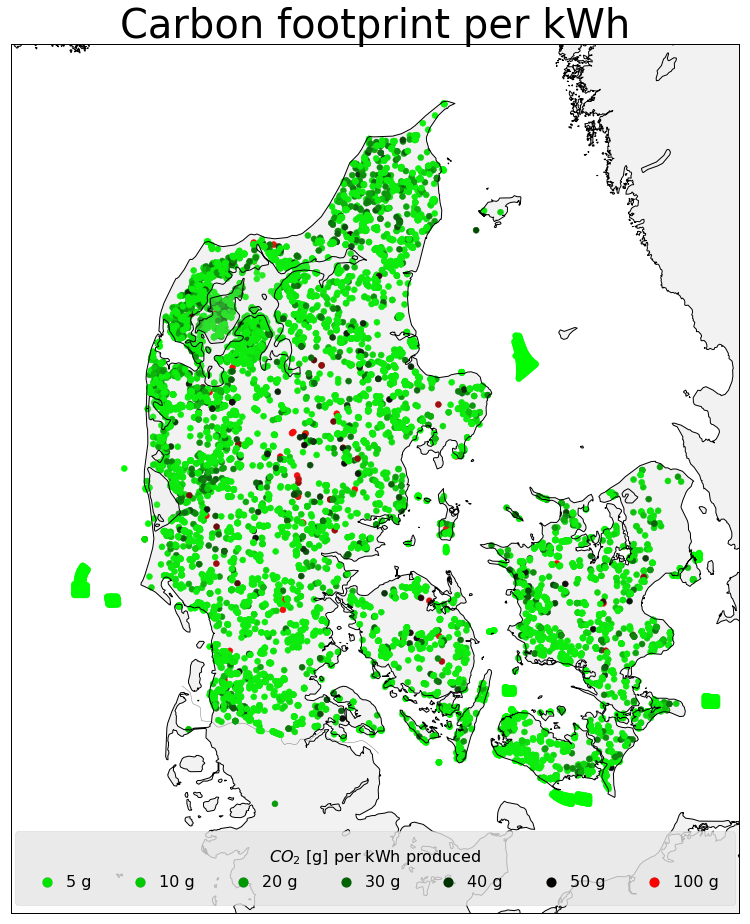

In [20]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

plt.rcParams.update({'font.size': 16})
import matplotlib.colors as mcolors

cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))}

color_map = mcolors.LinearSegmentedColormap('my_colormap', cdict, 100)


plt.figure(figsize=(14,16))
my_map = Basemap(projection='merc', lat_0=56, lon_0=11,
              resolution='h', area_thresh=0.1,
                llcrnrlon = 7, llcrnrlat = 54,
                 urcrnrlon=13, urcrnrlat=58)
 
my_map.drawcoastlines()
my_map.drawcountries(color="grey", zorder=1)
my_map.fillcontinents(color='grey', zorder=1, alpha=.1)
my_map.drawmapboundary(fill_color="white")

#We filter out teh really bad wind tubrines with a too low load factor
df_data=df_all[(df_all["Estimated load factor"]>0.1)]


data=np.array(df_data["Carbon footprint per kWh"])

p_max=max(data)

x,y = my_map(df_data["lon"].tolist(), df_data["lat"].tolist())
my_map.scatter(x, y, marker='o', edgecolor=None, zorder=1, cmap=color_map, c=color_map(df_data['Carbon footprint per kWh']/1000))


l1 = plt.scatter([],[], s=100,  edgecolor='black', linewidth='0.1', color=color_map(5), cmap=color_map)
l2 = plt.scatter([],[], s=100, edgecolor='black', linewidth='0.1', color=color_map(10), cmap=color_map)
l3 = plt.scatter([],[], s=100,  edgecolor='black', linewidth='0.1', color=color_map(20), cmap=color_map)
l4 = plt.scatter([],[], s=100,  edgecolor='black', linewidth='0.1', color=color_map(30), cmap=color_map)
l5 = plt.scatter([],[], s=100, edgecolor='black', linewidth='0.1', color=color_map(40), cmap=color_map)
l6 = plt.scatter([],[], s=100,  edgecolor='black', linewidth='0.1', color=color_map(50), cmap=color_map)
l7 = plt.scatter([],[], s=100,  edgecolor='black', linewidth='0.1', color=color_map(100), cmap=color_map)

labels = ["5 g", "10 g", "20 g", "30 g", "40 g", "50 g", "100 g"]

leg = plt.legend([l1, l2, l3, l4, l5, l6, l7], labels, ncol=7, frameon=True, fontsize=16,
handlelength=2, loc = 8, borderpad = 1, handletextpad=.2, title='$CO_2$ [g] per kWh produced', scatterpoints = 1)
plt.title('Carbon footprint per kWh', fontsize = 40)

plt.show()

Alternatively, you can serve interactive maps with Leaflet, which is what was done with [LCA_WIND_DK](http://viewer.webservice-energy.org/lca-wind-dk/) :-)